Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

reading the data and data exploration

In [2]:
train_df = pd.read_csv('BigmartSales.csv')
test_df = pd.read_csv('BM_Test.csv')

In [ ]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
#cleaning dataset starting with the train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


Both Outlet_Size and Item_Weight have missing values in both of the datasets we have to find a way to impute the missing values either using mean or median.


# Imputing missing values in item_weight column

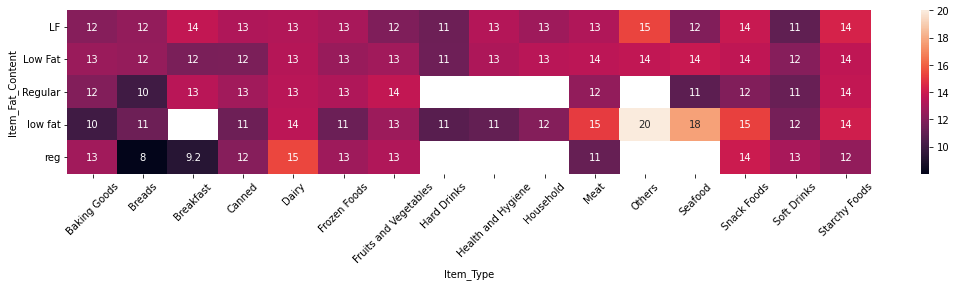

In [ ]:
#plotting item_type and item_fat_content against the item-weight
fig = plt.figure(figsize = (18, 3))

sns.heatmap(train_df.pivot_table(index = 'Item_Fat_Content', columns = 'Item_Type', values = 'Item_Weight'), annot = True);

plt.xticks(rotation = 45);

We can see that the average range of values in the item_weight is between 10 and 15

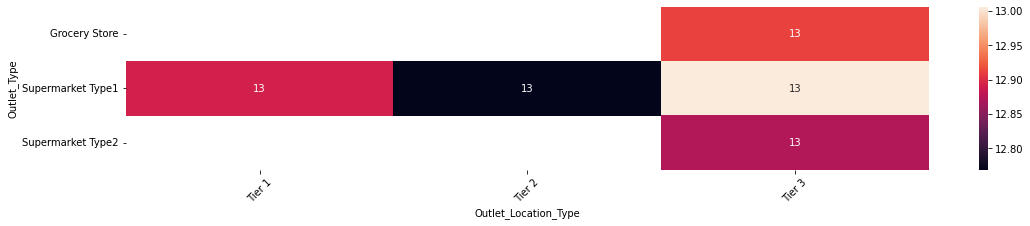

In [ ]:
#pivot table to plot outlet_type and outlet_location_type and item-weight
fig = plt.figure(figsize = (18, 3))

sns.heatmap(train_df.pivot_table(index = 'Outlet_Type', columns = 'Outlet_Location_Type', values = 'Item_Weight'), annot = True);

plt.xticks(rotation = 45);

Based on the Outlet_type and the Outlet_location the average range of item_weight is 13.

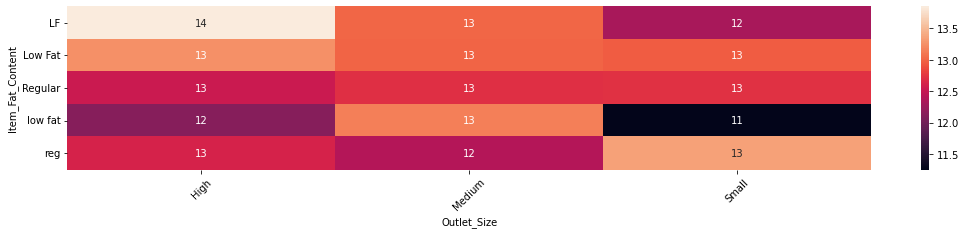

In [ ]:
#pivot table to plot item_fat_content and outlet_size against item_weight
fig = plt.figure(figsize = (18, 3))

sns.heatmap(train_df.pivot_table(index = 'Item_Fat_Content', columns = 'Outlet_Size', values = 'Item_Weight'), annot = True);

plt.xticks(rotation = 45);

 based on different combinations of Item_Fat_Content and Outlet_Size, the average range of values for the column Item_Weight is also constant at 13.

We will impute the missing values in the item_weight column using an uniform distribution with parameters a=10 and b=14.

In [3]:
#assigning a variable to the indexes with missing values in the training data
item_weight_indices_to_be_updated = train_df[train_df['Item_Weight'].isnull()].index

#updating the values with the distribution named above
train_df.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14, 
                                                                                   len(item_weight_indices_to_be_updated))

In [4]:
#assigning a variable to the indexes with missing values in the test data
item_weight_indices_to_be_updated = test_df[test_df['Item_Weight'].isnull()].index

#updating the values with the distribution named above
test_df.loc[item_weight_indices_to_be_updated, 'Item_Weight'] = np.random.uniform(10, 14, 
                                                                                   len(item_weight_indices_to_be_updated))

# Imputing missing values in outlet_size column

Creating two different datasets - one where we have non-null values for the column Outlet_Size and in the other dataset, all the values of the column Outlet_Size are missing. <br>We then check the distribution of the other variables in the dataset where Outlet_Size is missing to identify if there is any pattern present or not.

In [5]:
#dataset with non-null values
outlet_size_data = train_df[train_df['Outlet_Size'].notnull()]

#dataset where the column values are missing
outlet_size_missing_data = train_df[train_df['Outlet_Size'].isnull()]

We are going to plot the dataset with missing values against all the categorical variables in order to know the outlet_type, outlet_location_type and item_fat_content of majority of the missing values.

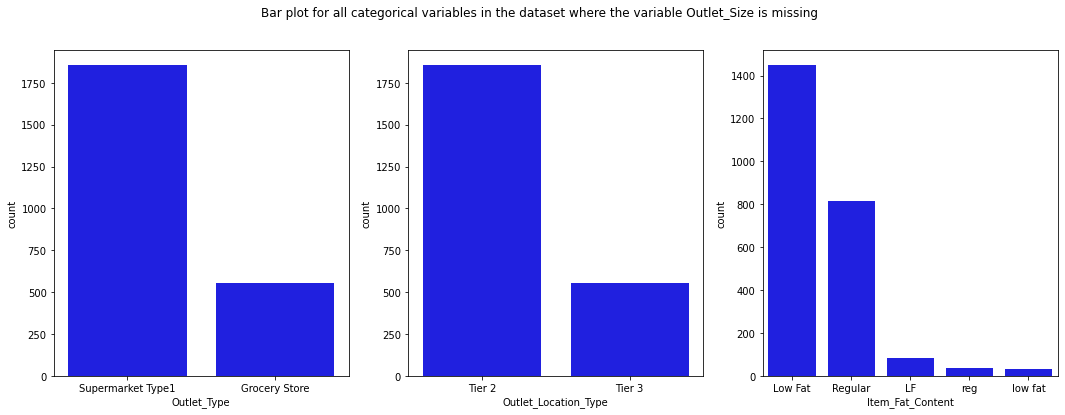

In [6]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
  
fig.suptitle('Bar plot for all categorical variables in the dataset where the variable Outlet_Size is missing')
  
sns.countplot(ax = axes[0], x = 'Outlet_Type', data = outlet_size_missing_data, color = 'blue', 
              order = outlet_size_missing_data['Outlet_Type'].value_counts().index);

sns.countplot(ax = axes[1], x = 'Outlet_Location_Type', data = outlet_size_missing_data, color = 'blue', 
              order = outlet_size_missing_data['Outlet_Location_Type'].value_counts().index);

sns.countplot(ax = axes[2], x = 'Item_Fat_Content', data = outlet_size_missing_data, color = 'blue', 
              order = outlet_size_missing_data['Item_Fat_Content'].value_counts().index);

We can see that, wherever Outlet_Size is missing in the dataset, the majority of them have Outlet_Type as Supermarket Type 1, Outlet_Location_Type as Tier 2, and Item_Fat_Content as Low Fat

Next is creating a cross-tab of all the categorical variables against the column Outlet_Size, where we want to impute the missing values.

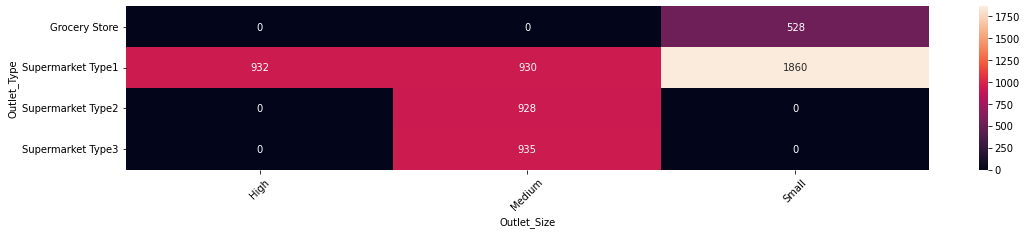

In [ ]:
#plottting outlet size against outlet type
ig= plt.figure(figsize=(18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_data['Outlet_Type'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation=45);

We observe from the above heatmap that all the grocery stores have Outlet_Size as small.
All the Supermarket Type 2 and Supermarket Type 3 have Outlet_Size as Medium.

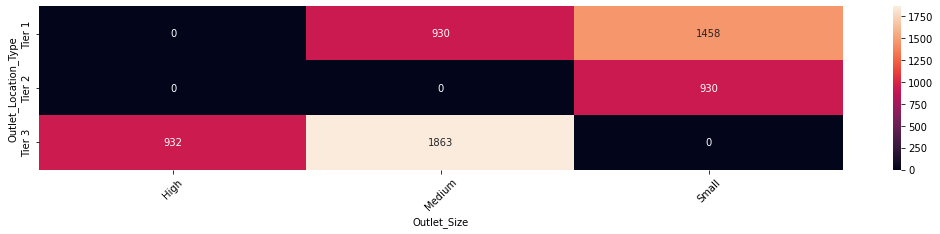

In [ ]:
#plotting outlet size and outlet location type
fig = plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_data['Outlet_Location_Type'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

We observe from the above heatmap that all the Tier 2 stores have Outlet_Size as Small.


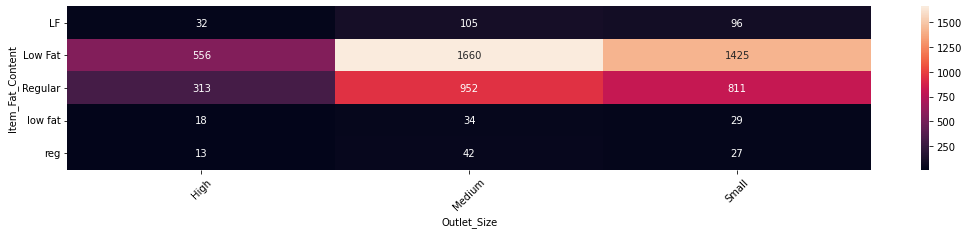

In [ ]:
#plotting outlet size and item_fat_content
fig = plt.figure(figsize = (18, 3))

sns.heatmap(pd.crosstab(index = outlet_size_data['Item_Fat_Content'], columns = outlet_size_data['Outlet_Size']), annot = True, fmt = 'g')

plt.xticks(rotation = 45);

There does not seem to be any clear pattern between the variables Item_Fat_Content and Outlet_Size.<br> 
So we will not use it

We will use the patterns discovered above to impute the missing values

In [7]:
#assigning a variable to missing values where the outlet type is 'grocery store.
grocery_store_indices = train_df[train_df['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index
# filling those missing values with the outlet size 'small'.
train_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'


#assigning a variable to the missing values where outlet type is Tier2
tier_2_indices = train_df[train_df['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index
#filling those missing values with the outlet size 'small'.
train_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

Performing the same on the test dataset

In [8]:
#assigning a variable to missing values where the outlet type is 'grocery store.
grocery_store_indices = test_df[test_df['Outlet_Size'].isnull()].query(" Outlet_Type == 'Grocery Store' ").index
# filling those missing values with the outlet size 'small'.
test_df.loc[grocery_store_indices, 'Outlet_Size'] = 'Small'


#assigning a variable to the missing values where outlet type is Tier2
tier_2_indices = test_df[test_df['Outlet_Size'].isnull()].query(" Outlet_Location_Type == 'Tier 2' ").index
#filling those missing values with the outlet size 'small'.
test_df.loc[tier_2_indices, 'Outlet_Size'] = 'Small'

In [9]:
train_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

# Feature Engineering

We are creating a new feature Outlet_Age which indicates how old the outlet is.

In [11]:
#calculating the outlet age by subtracting the year the data was collected,'2013' and the establishment year
train_df['Outlet_Age'] = 2013 - train_df['Outlet_Establishment_Year']

test_df['Outlet_Age'] = 2013 - test_df['Outlet_Establishment_Year']

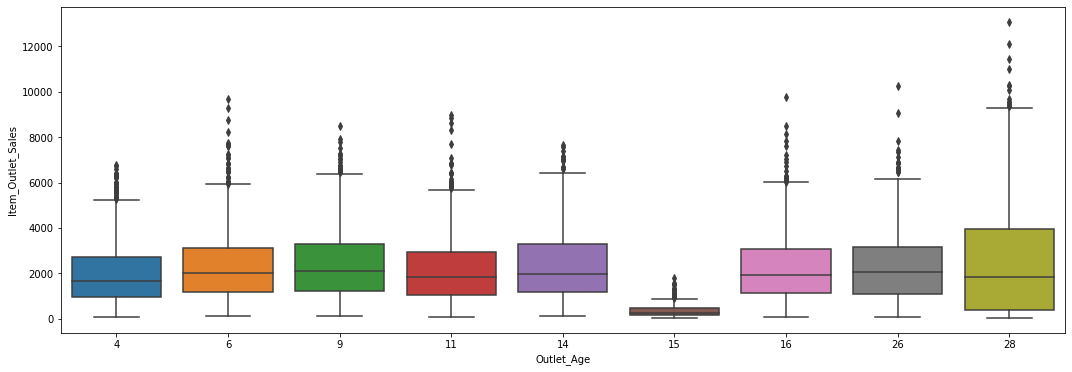

In [12]:
#plotting the outlet age and the sales to see whether there is a pattern
fig = plt.figure(figsize = (18, 6))

sns.boxplot(x = 'Outlet_Age', y = 'Item_Outlet_Sales', data = train_df);

The hypothesis that we had - As the store gets older, the sales increase does not seem to hold based on the above plot

# Modelling

In [16]:
#Removing the target feature and the new featyre establishment year from the training features
train_features = train_df.drop(['Item_Identifier','Item_Outlet_Sales', 'Outlet_Establishment_Year','Outlet_Identifier'], axis = 1)

#defining the target feature
train_target = train_df['Item_Outlet_Sales']

In [17]:
train_features.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,14
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,15
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,26


In [22]:
# Creating dummy variables for the categorical variables
train_features = pd.get_dummies(train_features, drop_first = True)
#train_features.drop(['Item_Fat_Content_low fat','Item_Fat_Content_Low Fat'],axis=1,inplace=True)
train_features.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,14,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,4,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,14,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,15,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,8.93,0.000000,53.8614,26,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [23]:
#scaling the data using minmax scaler
scaler = MinMaxScaler()
# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_features.index, columns = train_features.columns)

train_features_scaled.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Regular,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.416667,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.458333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.916667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [27]:
!pip install catboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.7 MB/s eta 0:00:00


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [25]:


# Split data into training and test sets
X = train_features_scaled
y = train_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}


# Create XGBoost Regression model and use GridSearchCV to find best hyperparameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Make predictions on test set using best model from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 1065452.4520262745
R-squared: 0.6079969882256542


In [32]:
# Split data into training and test sets
X = train_features_scaled
y = train_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create CatBoost Regression model and use GridSearchCV to find best hyperparameters
catboost_model = CatBoostRegressor(loss_function='RMSE', random_state=42, silent=True)
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Make predictions on test set using best model from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 1052998.3151974145
R-squared: 0.6125791346524405


# Feature Selection

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled.values, i) for i in range(train_features_scaled.shape[1])],
    index = train_features_scaled.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

Item_Weight                        4.734921
Item_Visibility                    2.899377
Item_MRP                           4.154920
Outlet_Age                         9.935618
Item_Fat_Content_Regular           1.843482
Item_Fat_Content_reg               1.037646
Item_Type_Breads                   1.389551
Item_Type_Breakfast                1.172080
Item_Type_Canned                   2.000024
Item_Type_Dairy                    2.064496
Item_Type_Frozen Foods             2.314908
Item_Type_Fruits and Vegetables    2.909580
Item_Type_Hard Drinks              1.363645
Item_Type_Health and Hygiene       1.878725
Item_Type_Household                2.553111
Item_Type_Meat                     1.659279
Item_Type_Others                   1.287410
Item_Type_Seafood                  1.099832
Item_Type_Snack Foods              2.862202
Item_Type_Soft Drinks              1.712876
Item_Type_Starchy Foods            1.232452
Outlet_Size_Medium                 7.856827
Outlet_Size_Small 

Dropping Item Type

In [43]:
train_features_scaled_new2 = train_features_scaled.drop(['Item_Type_Breads',
'Item_Type_Breakfast',
'Item_Type_Canned',
'Item_Type_Dairy',
'Item_Type_Frozen Foods',
'Item_Type_Fruits and Vegetables',
'Item_Type_Hard Drinks',
'Item_Type_Health and Hygiene',
'Item_Type_Household',
'Item_Type_Meat',
'Item_Type_Others',
'Item_Type_Seafood',
'Item_Type_Snack Foods',
'Item_Type_Soft Drinks',
'Item_Type_Starchy Foods', 'Outlet_Age','Item_Fat_Content_reg'], axis = 1)

In [44]:
vif_series = pd.Series(
    [variance_inflation_factor(train_features_scaled_new2.values, i) for i in range(train_features_scaled_new2.shape[1])],
    index = train_features_scaled_new2.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

Item_Weight                      4.583825
Item_Visibility                  2.747788
Item_MRP                         4.002490
Item_Fat_Content_Regular         1.512664
Outlet_Size_Medium               6.682166
Outlet_Size_Small                5.697245
Outlet_Location_Type_Tier 2      3.745941
Outlet_Location_Type_Tier 3      4.263017
Outlet_Type_Supermarket Type1    5.985322
Outlet_Type_Supermarket Type2    4.723888
Outlet_Type_Supermarket Type3    4.771494
dtype: float64



In [45]:
X = train_features_scaled_new2
y = train_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}


# Create XGBoost Regression model and use GridSearchCV to find best hyperparameters
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Make predictions on test set using best model from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 1069997.2036105576
R-squared: 0.6063248757766968


In [47]:
# Split data into training and test sets
X = train_features_scaled_new2
y = train_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create CatBoost Regression model and use GridSearchCV to find best hyperparameters
catboost_model = CatBoostRegressor(loss_function='RMSE', random_state=42, silent=True)
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Make predictions on test set using best model from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 1047964.1774855086
R-squared: 0.6144313028472772


In [48]:
train_features_scaled_new3=train_features_scaled_new2.drop(['Outlet_Size_Small','Outlet_Size_Medium','Item_Visibility','Item_Weight' ],axis=1)

In [49]:
# Split data into training and test sets
X = train_features_scaled_new3
y = train_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5]
}

# Create CatBoost Regression model and use GridSearchCV to find best hyperparameters
catboost_model = CatBoostRegressor(loss_function='RMSE', random_state=42, silent=True)
grid_search = GridSearchCV(catboost_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Make predictions on test set using best model from GridSearchCV
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate performance using MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 1043062.8150335217
R-squared: 0.6162346201509472
